# Analysis of the incidence of chickenpox

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [2]:
data_url = "https://www.sentiweb.fr/datasets/all/inc-7-PAY-ds2.csv"

In [3]:
data_file = "chicken-pox.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

In [4]:
raw_data = pd.read_csv(data_file, skiprows=1)
raw_data

week geo_insee  indicator    inc  inc100  inc_up  inc_low  inc100_up  \
0    201601        FR          7  14557      22   16108    13006         25   
1    201602        FR          7  11640      18   13031    10249         20   
2    201603        FR          7  16287      25   17937    14637         28   
3    201604        FR          7  14785      23   16341    13229         25   
4    201605        FR          7  19007      29   20783    17231         32   
5    201606        FR          7  18924      29   20716    17132         32   
6    201607        FR          7  21545      33   23470    19620         36   
7    201608        FR          7  19338      30   21170    17506         32   
8    201609        FR          7  14289      22   15867    12711         24   
9    201610        FR          7  18140      28   19881    16399         31   
10   201611        FR          7  15245      23   16841    13649         26   
11   201612        FR          7  18307      28   20062    16552         31   
12   201613        FR          7  16812      26   18509    15115         28   
13   201614        FR          7  20837      32   22746    18928         35   
14   201615        FR          7  19870      30   21766    17974         33   
15   201616        FR          7  18489      28   20334    16644         31   
16   201617        FR          7  16307      25   18060    14554         28   
17   201618        FR          7  14501      22   16117    12885         25   
18   201619        FR          7  19811      30   21683    17939         33   
19   201620        FR          7  14479      22   16085    12873         25   
20   201621        FR          7  18955      29   20809    17101         32   
21   201622        FR          7  18037      28   19823    16251         30   
22   201623        FR          7  18679      29   20486    16872         31   
23   201624        FR          7  18540      28   20365    16715         31   
24   201625        FR          7  16245      25   17946    14544         28   
25   201626        FR          7  21040      32   23009    19071         35   
26   201627        FR          7  14362      22   16031    12693         25   
27   201628        FR          7  15559      24   17369    13749         27   
28   201629        FR          7  14419      22   16203    12635         25   
29   201630        FR          7  10675      16   12216     9134         19   
..      ...       ...        ...    ...     ...     ...      ...        ...   
463  202447        FR          7   4296       6    5090     3502          8   
464  202448        FR          7   3736       6    4469     3003          7   
465  202449        FR          7   4853       7    5704     4002          9   
466  202450        FR          7   5496       8    6407     4585         10   
467  202451        FR          7   5005       8    5885     4125          9   
468  202452        FR          7   3929       6    4817     3041          7   
469  202501        FR          7   6059       9    9667     2451         14   
470  202502        FR          7   5966       9    9175     2757         14   
471  202503        FR          7   2462       4    3763     1161          6   
472  202504        FR          7   6895      10    9324     4466         14   
473  202505        FR          7   2087       3    3118     1056          5   
474  202506        FR          7   3455       5    4952     1958          7   
475  202507        FR          7   4502       7    6622     2382         10   
476  202508        FR          7   2835       4    4384     1286          7   
477  202509        FR          7   3381       5    5294     1468          8   
478  202510        FR          7   2921       4    4421     1421          7   
479  202511        FR          7   5878       9    9009     2747         13   
480  202512        FR          7   3855       6    5715     1995          9   
481  202513        FR          7   5964       9    8320  

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, geo_insee, indicator, inc, inc100, inc_up, inc_low, inc100_up, inc100_low]
Index: []

In [6]:
data = raw_data.dropna().copy()
data

week geo_insee  indicator    inc  inc100  inc_up  inc_low  inc100_up  \
0    201601        FR          7  14557      22   16108    13006         25   
1    201602        FR          7  11640      18   13031    10249         20   
2    201603        FR          7  16287      25   17937    14637         28   
3    201604        FR          7  14785      23   16341    13229         25   
4    201605        FR          7  19007      29   20783    17231         32   
5    201606        FR          7  18924      29   20716    17132         32   
6    201607        FR          7  21545      33   23470    19620         36   
7    201608        FR          7  19338      30   21170    17506         32   
8    201609        FR          7  14289      22   15867    12711         24   
9    201610        FR          7  18140      28   19881    16399         31   
10   201611        FR          7  15245      23   16841    13649         26   
11   201612        FR          7  18307      28   20062    16552         31   
12   201613        FR          7  16812      26   18509    15115         28   
13   201614        FR          7  20837      32   22746    18928         35   
14   201615        FR          7  19870      30   21766    17974         33   
15   201616        FR          7  18489      28   20334    16644         31   
16   201617        FR          7  16307      25   18060    14554         28   
17   201618        FR          7  14501      22   16117    12885         25   
18   201619        FR          7  19811      30   21683    17939         33   
19   201620        FR          7  14479      22   16085    12873         25   
20   201621        FR          7  18955      29   20809    17101         32   
21   201622        FR          7  18037      28   19823    16251         30   
22   201623        FR          7  18679      29   20486    16872         31   
23   201624        FR          7  18540      28   20365    16715         31   
24   201625        FR          7  16245      25   17946    14544         28   
25   201626        FR          7  21040      32   23009    19071         35   
26   201627        FR          7  14362      22   16031    12693         25   
27   201628        FR          7  15559      24   17369    13749         27   
28   201629        FR          7  14419      22   16203    12635         25   
29   201630        FR          7  10675      16   12216     9134         19   
..      ...       ...        ...    ...     ...     ...      ...        ...   
463  202447        FR          7   4296       6    5090     3502          8   
464  202448        FR          7   3736       6    4469     3003          7   
465  202449        FR          7   4853       7    5704     4002          9   
466  202450        FR          7   5496       8    6407     4585         10   
467  202451        FR          7   5005       8    5885     4125          9   
468  202452        FR          7   3929       6    4817     3041          7   
469  202501        FR          7   6059       9    9667     2451         14   
470  202502        FR          7   5966       9    9175     2757         14   
471  202503        FR          7   2462       4    3763     1161          6   
472  202504        FR          7   6895      10    9324     4466         14   
473  202505        FR          7   2087       3    3118     1056          5   
474  202506        FR          7   3455       5    4952     1958          7   
475  202507        FR          7   4502       7    6622     2382         10   
476  202508        FR          7   2835       4    4384     1286          7   
477  202509        FR          7   3381       5    5294     1468          8   
478  202510        FR          7   2921       4    4421     1421          7   
479  202511        FR          7   5878       9    9009     2747         13   
480  202512        FR          7   3855       6    5715     1995          9   
481  202513        FR          7   5964       9    8320  

In [7]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [8]:
sorted_data = data.set_index('period').sort_index()

In [9]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

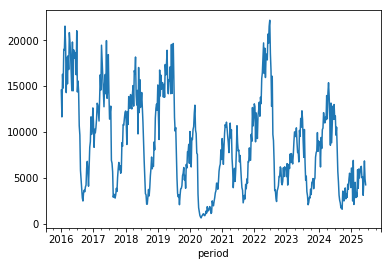

In [10]:
sorted_data['inc'].plot()

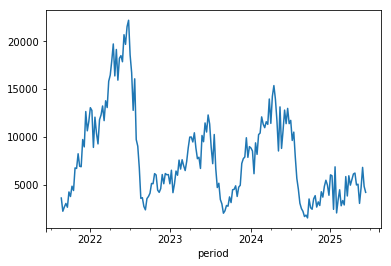

In [11]:
sorted_data['inc'][-200:].plot()

In [12]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(2016,
                                    sorted_data.index[-1].year)]

In [13]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

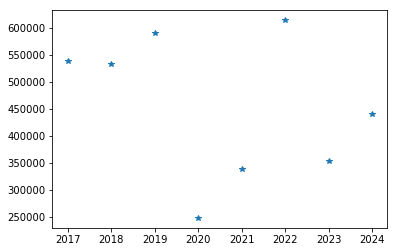

In [14]:
yearly_incidence.plot(style='*')

In [15]:
yearly_incidence.sort_values()

2020    247380
2021    338601
2023    353457
2024    439561
2018    533819
2017    538670
2019    591827
2022    614646
dtype: int64

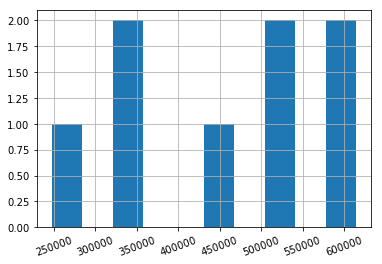

In [16]:
yearly_incidence.hist(xrot=20)